In [29]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Flooding Calls Over Time

The city of Chicago [Disaster Recovery Plan](https://www.cityofchicago.org/content/dam/city/depts/obm/supp_info/CDBG/Jan2015_HUD_Approved_Substantial_Amendment.pdf) was made largely in response to severe floods in April of 2013. The city also did most of its analysis by zip code, and while Austin generally had the most calls per event, interestingly for this specific event which prompted the funding request, it had fewer 311 calls than Chatham, but still the second highest out of the other top 6 community areas for flooding. 

In [14]:
comm_df = pd.read_csv('311_data/flood_calls_311_comm.csv')
# Taking top 6 community areas for flooding 
comm_df = comm_df[['Created Date','AUSTIN','ROSELAND','CHICAGO LAWN','AUBURN GRESHAM','WASHINGTON HEIGHTS','CHATHAM']].copy()
comm_df['Created Date'] = pd.to_datetime(comm_df['Created Date'])
comm_df = comm_df.set_index(pd.DatetimeIndex(comm_df['Created Date']))
# Just get calls since the beginning of 2010
comm_df = comm_df['2010-01-01':]
comm_df.head()

,Created Date,AUSTIN,ROSELAND,CHICAGO LAWN,AUBURN GRESHAM,WASHINGTON HEIGHTS,CHATHAM
2010-01-01,2010-01-01,0,1,0,0,0,0
2010-01-02,2010-01-02,0,0,0,0,0,0
2010-01-03,2010-01-03,0,0,0,1,0,0
2010-01-04,2010-01-04,1,2,2,0,0,1
2010-01-05,2010-01-05,0,0,0,0,0,0


In [15]:
comm_month_grp = comm_df.groupby([comm_df.index.year,comm_df.index.month]).sum()
comm_month_grp.head()

AUSTIN  ROSELAND  CHICAGO LAWN  AUBURN GRESHAM  WASHINGTON HEIGHTS  \
2010 1      17        20             9               9                  10   
     2      17        17            11               9                   4   
     3      26        39            15              24                  20   
     4      51        48            31              32                  27   
     5     134        73           205              76                  49   

        CHATHAM  
2010 1       17  
     2        6  
     3       11  
     4       11  
     5       39

### Results Over Time

While Austin still has nearly double the next highest amount of 311 calls for flooding since 2010, it didn't happen to have quite as many as Chatham in April of 2013. Still, it had the second highest, so it's worth looking at why it didn't have as much focus in the city's plan.

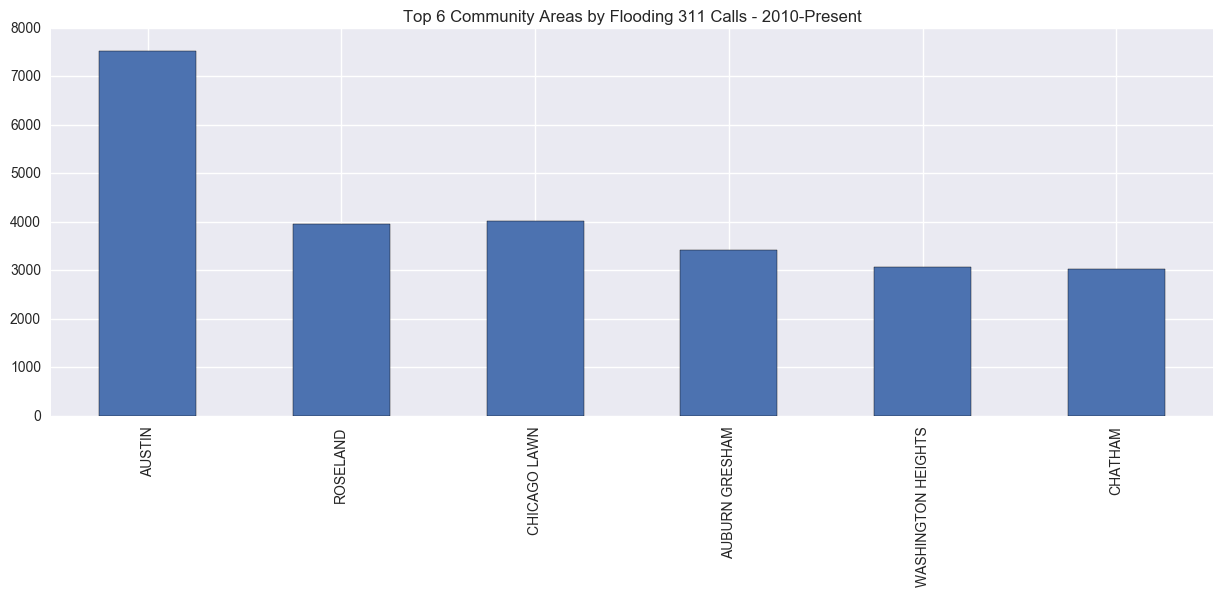

In [25]:
comm_month_grp.sum().plot(title='Top 6 Community Areas by Flooding 311 Calls - 2010-Present', kind='bar')

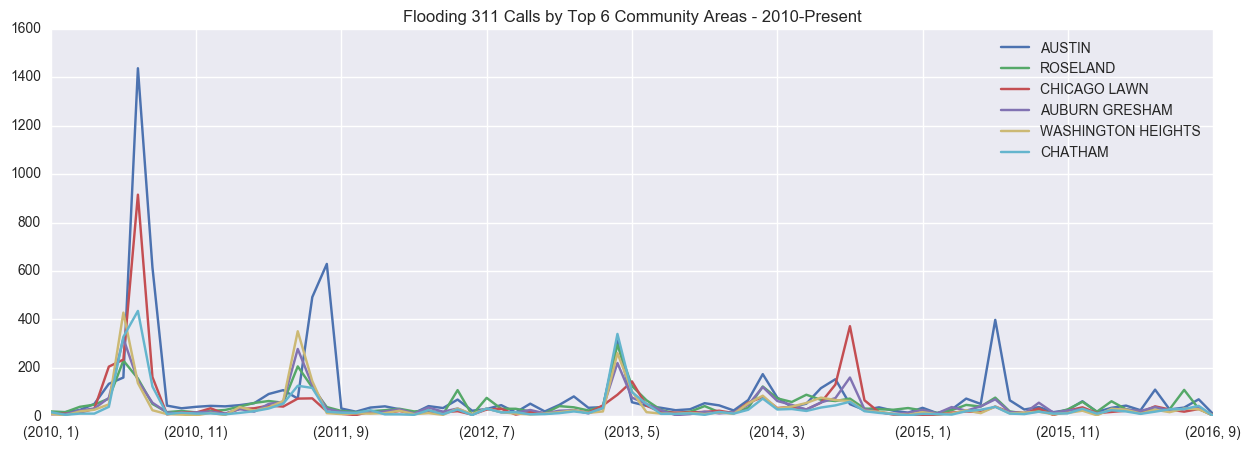

In [24]:
plt.rcParams["figure.figsize"] = [15, 5]
comm_month_grp.plot(title='Flooding 311 Calls by Top 6 Community Areas - 2010-Present')

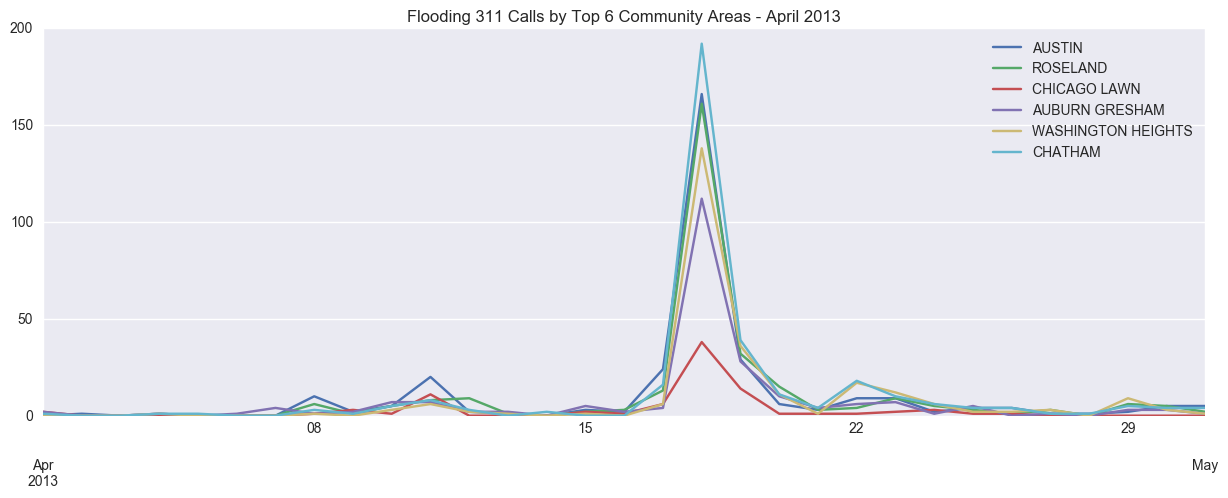

In [23]:
april_df = comm_df['2013-04-01':'2013-05-01']
april_df.plot(title='Flooding 311 Calls by Top 6 Community Areas - April 2013')

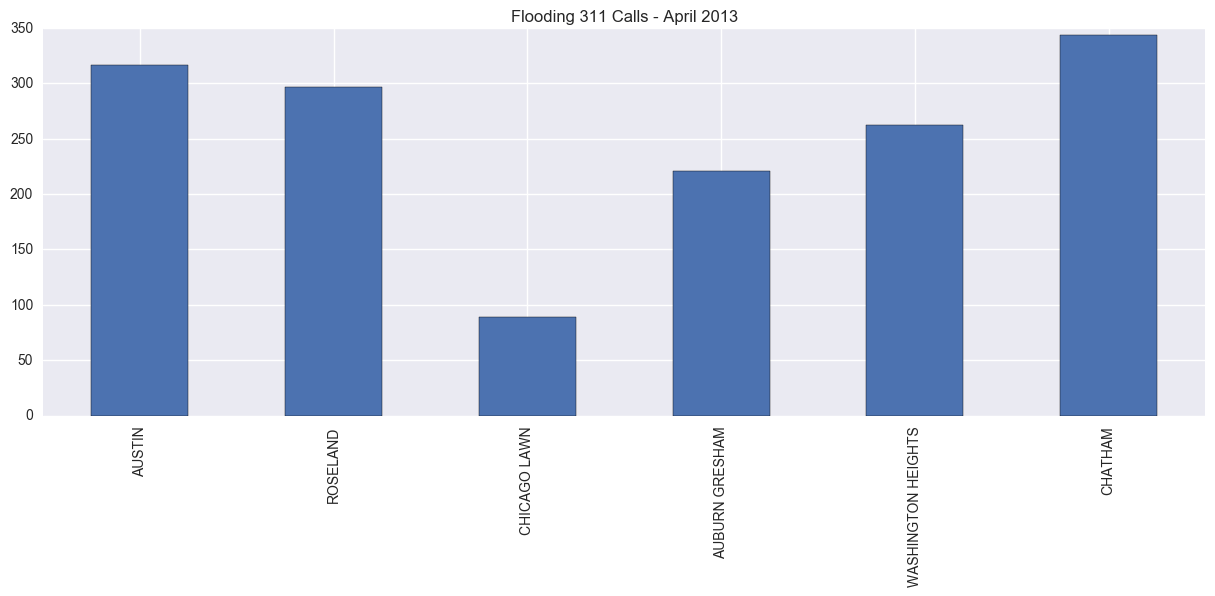

In [22]:
april_df.sum().plot(title='Flooding 311 Calls - April 2013', kind='bar')

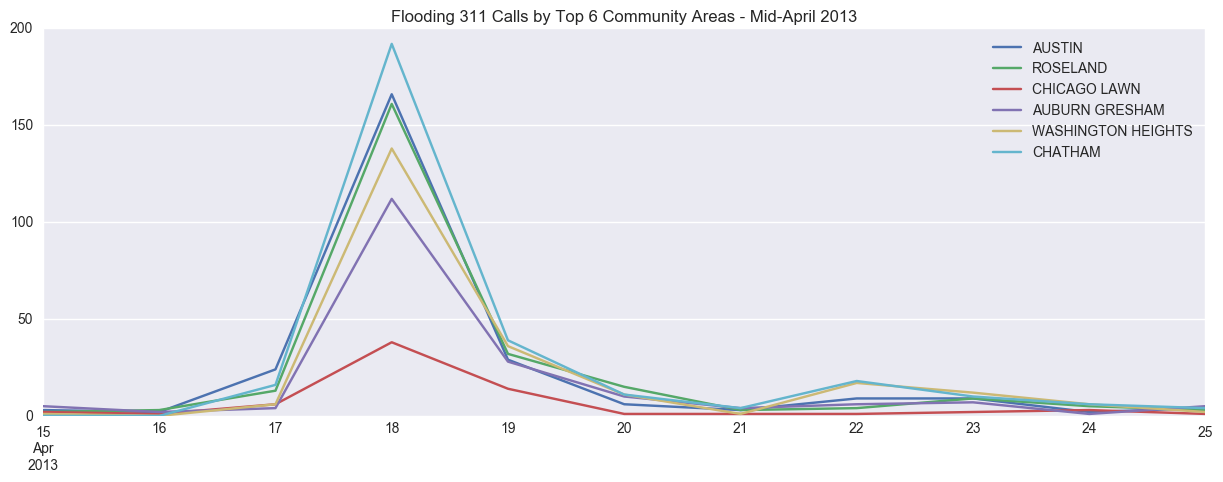

In [28]:
mid_april_df = comm_df['2013-04-15':'2013-04-25']
mid_april_df.plot(title='Flooding 311 Calls by Top 6 Community Areas - Mid-April 2013')